# Kaggle cats-or-dogs binary classification

* Building a convolutional neural network for binary classification of images.
* 3,000 JPG pictures of cats and dogs from the ["Dogs vs. Cats" dataset](https://www.kaggle.com/c/dogs-vs-cats/data) available on Kaggle.
* Labelling the data set automatically using ImageDataGenerator in Keras.
* Checkpoint with EarlyStopping and ModelCheckpoint
* History of training/validation accuracy and loss
* Visualization of feature maps on convolution and pooling layers.

Train a CNN
1. 16 x 3 x 3 convolution layer
2. 2 x 2 max pooling layer
1. 32 x 3 x 3 convolution layer
2. 2 x 2 max pooling layer
1. 64 x 3 x 3 convolution layer
2. 2 x 2 max pooling layer
3. 512-neurons hidden layer (ReLU)
4. output layer (sigmoid)

Optimizer: RMSprop with learning rate = 0.001

Loss function: binary cross-entropy

## Download the cat and dog images

In [1]:
!wget --no-check-certificate \
  https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip \
  -O ~/Downloads/cats_and_dogs_filtered.zip

--2019-07-24 20:53:43--  https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 172.217.4.112
Connecting to storage.googleapis.com (storage.googleapis.com)|172.217.4.112|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 68606236 (65M) [application/zip]
Saving to: ‘/Users/johanzhuohan/Downloads/cats_and_dogs_filtered.zip’

/Users/johanzhuohan 100%[===================>]  65.43M  21.2MB/s    in 3.1s    

2019-07-24 20:53:47 (21.2 MB/s) - ‘/Users/johanzhuohan/Downloads/cats_and_dogs_filtered.zip’ saved [68606236/68606236]



In [2]:
import os
import zipfile

local_zip = '/Users/johanzhuohan/Downloads/cats_and_dogs_filtered.zip'

zip_ref = zipfile.ZipFile(local_zip, 'r')

zip_ref.extractall('/Users/johanzhuohan/Downloads')
zip_ref.close()

In [3]:
base_dir = '/Users/johanzhuohan/Downloads/cats_and_dogs_filtered'

train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')

# Directory with our training cat/dog pictures
train_cats_dir = os.path.join(train_dir, 'cats')
train_cats_names = os.listdir(train_cats_dir)
train_dogs_dir = os.path.join(train_dir, 'dogs')
train_dogs_names = os.listdir(train_dogs_dir)

# Directory with our validation cat/dog pictures
validation_cats_dir = os.path.join(validation_dir, 'cats')
validation_dogs_dir = os.path.join(validation_dir, 'dogs')

In [4]:
print('total training cat images :', len(os.listdir(      train_cats_dir ) ))
print('total training dog images :', len(os.listdir(      train_dogs_dir ) ))

print('total validation cat images :', len(os.listdir( validation_cats_dir ) ))
print('total validation dog images :', len(os.listdir( validation_dogs_dir ) ))

total training cat images : 1000
total training dog images : 1000
total validation cat images : 500
total validation dog images : 500


## Training a Convolutional neural network

In [13]:
import tensorflow as tf

model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2), 
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'), 
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(), 
    tf.keras.layers.Dense(512, activation='relu'), 
    tf.keras.layers.Dense(1, activation='sigmoid')  
])

model.summary()  

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 148, 148, 16)      448       
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 74, 74, 16)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 72, 72, 32)        4640      
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 36, 36, 32)        0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 34, 34, 64)        18496     
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 17, 17, 64)        0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 18496)            

* Set the optimizer and the loss function
* Try 'sgd', or 'Adam' for optimizer

In [14]:
from tensorflow.keras.optimizers import RMSprop

model.compile(loss='binary_crossentropy',
              optimizer=RMSprop(lr=0.001),
              metrics=['acc'])

* Data processing with ImageDataGenerator

In [15]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator( rescale = 1.0/255. )
test_datagen  = ImageDataGenerator( rescale = 1.0/255. )

train_generator = train_datagen.flow_from_directory(train_dir,
                                                    batch_size=20,
                                                    class_mode='binary',
                                                    target_size=(150, 150))     

validation_generator =  test_datagen.flow_from_directory(validation_dir,
                                                         batch_size=20,
                                                         class_mode  = 'binary',
                                                         target_size = (150, 150))

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


* Setting EarlyStopping and ModelCheckpoint

In [16]:
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.callbacks import ModelCheckpoint

es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=5)
mc = ModelCheckpoint('best_model.h5', monitor='val_acc', mode='max', verbose=1, save_best_only=True)

* Training with checkpoints defined with EarlyStopping and ModelCheckpoint

In [17]:
history = model.fit_generator(train_generator,
                              validation_data=validation_generator,
                              steps_per_epoch=100,
                              epochs=50,
                              validation_steps=50,
                              callbacks=[es, mc],
                              verbose=1)

Epoch 1/50
 99/100 [============================>.] - ETA: 0s - loss: 0.7373 - acc: 0.5616  

## Accuracy and Loss history

As it can be seen, while the accuracy increases and loss decreases continuously for training data set during training, the model performance on validation set does not improve a lot after the 1-2 epochs. Actually, the validation loss increases rapidly when the model is trained further, which indicates the overfitting. Therefore, there is no point in continuing training, and the early-stopping is needed for training the model.

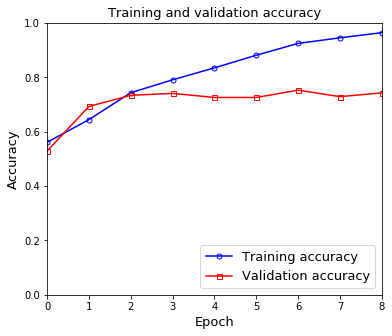

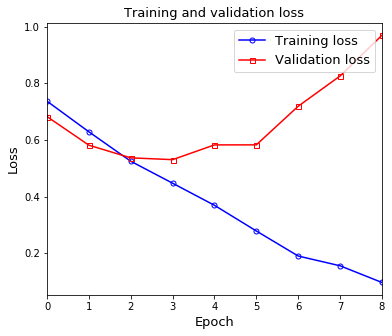

In [18]:
import matplotlib.pyplot as plt

acc = history.history[ 'acc' ]
val_acc = history.history[ 'val_acc' ]
loss = history.history[ 'loss' ]
val_loss = history.history['val_loss' ]

epochs = range(len(acc)) # Get number of epochs

markers = 5
font = 13
# Accuracy
fig, ax = plt.subplots(figsize = (6,5))
ax.plot  ( epochs, acc, 'bo-', label='Training accuracy', markerfacecolor="None",markersize=markers )
ax.plot  ( epochs, val_acc, 'rs-', label='Validation accuracy', markerfacecolor="None",markersize=markers )
ax.set_title ('Training and validation accuracy', fontsize=font)
ax.set_xlabel('Epoch', fontsize=font)
ax.set_ylabel('Accuracy', fontsize=font)
ax.set(xlim=[0,epochs[-1]], ylim=[0.0,1.0])
ax.legend(loc='lower right',frameon=True,fontsize=font)

# Loss
fig, ax = plt.subplots(figsize = (6,5))
plt.plot  ( epochs, loss, 'bo-', label='Training loss', markerfacecolor="None",markersize=markers )
plt.plot  ( epochs, val_loss, 'rs-', label='Validation loss', markerfacecolor="None",markersize=markers )
plt.title ('Training and validation loss'   )
ax.set_title ('Training and validation loss', fontsize=font)
ax.set_xlabel('Epoch', fontsize=font)
ax.set_ylabel('Loss', fontsize=font)
ax.set(xlim=[0,epochs[-1]])
ax.legend(loc='upper right',frameon=True,fontsize=font)
plt.show()

## Visualizing convoluted images

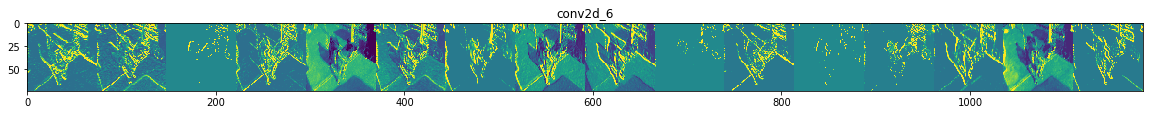

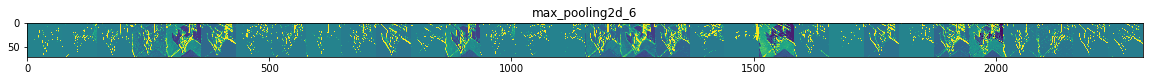

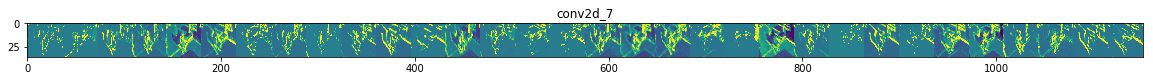

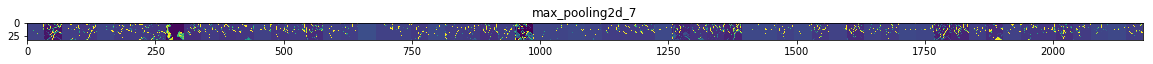

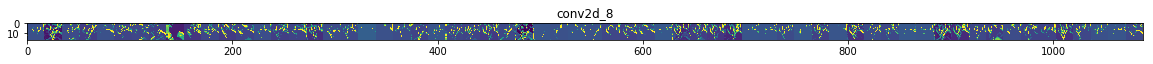

In [26]:
import numpy as np
import random
from tensorflow.keras.preprocessing.image import img_to_array, load_img
import matplotlib.pyplot as plt


successive_outputs = [layer.output for layer in model.layers[1:]]
visualization_model = tf.keras.models.Model(inputs = model.input, outputs = successive_outputs)

# randomly choosing an example image from training data set
cats_img_files = [os.path.join(train_cats_dir, f) for f in train_cats_names]
dogs_img_files = [os.path.join(train_dogs_dir, f) for f in train_dogs_names]
img_path = random.choice(cats_img_files + dogs_img_files)
img = load_img(img_path, target_size=(150, 150))  # this is a PIL image, RGB mode (3 channel)
x = img_to_array(img)  # Numpy array with shape (150, 150, 3)
x = x.reshape((1,) + x.shape)  # Numpy array with shape (1, 150, 150, 3)
x /= 255 # Rescale by 1/255

# successive layers for data x
successive_feature_maps = visualization_model.predict(x)
# name of layers
layer_names = [layer.name for layer in model.layers]

# Plot
for layer_name, feature_map in zip(layer_names, successive_feature_maps):
    if len(feature_map.shape) == 4:
        n_features = feature_map.shape[-1]  # number of features in feature map
        size = feature_map.shape[1] # size of pictures, The feature map has shape (1, size, size, n_features)
        display_grid = np.zeros((size, size * n_features))
        for i in range(n_features):
            
            x = feature_map[0, :, :, i]
            x -= x.mean() # normalization
            x /= x.std()
            x *= 64
            x += 128
            x = np.clip(x, 0, 255).astype('uint8') # set lower (0) and upper (255) limit on the value
            display_grid[:, i * size : (i + 1) * size] = x
            
        # Display the grid
        scale = 20. / n_features
        plt.figure(figsize=(scale * n_features, scale))
        plt.title(layer_name)
        plt.grid(False)
        plt.imshow(display_grid, aspect='auto', cmap='viridis') 
plt.show()